### Case Study on ANOVA

#### XYZ Company has offices in four different zones. The company wishes to investigate the following :
##### ● The mean sales generated by each zone.
##### ● Total sales generated by all the zones for each month.
##### ● Check whether all the zones generate the same amount of sales.
######  Help the company to carry out their study with the help of data provided.

In [2]:
# Importing Pandas Library as 'pd'
import pandas as pd
# Importing NumPy Library as 'np'
import numpy as np
# Importing matplot pyplot Library as 'plt'
import matplotlib.pyplot as plt
# Importing seaborn Library as 'sns'
import seaborn as sns
# Importing scipy itself
import scipy

### Read the data into python.

In [3]:
# Getting data from Local CSV File and copying into 'data' Datafram
data=pd.read_csv('Sales_data_zone_wise.csv')

In [4]:
# Getting data of dataframe data
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
#Shape of dataset.
data.shape

(29, 5)

> ***Insights:-***
* Here 29 rows and 5 columns in the dataset. 

In [6]:
#Information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


> ***Insights:-***
* Data set showing the zone wise sales details of a company of 29 observations.<br>
* There are 5 features in total.<br>
* All the features are object and int data-type with 64 bit.</b>

In [7]:
#Checking null values 
data.isna().sum().to_frame()

,0
Month,0
Zone - A,0
Zone - B,0
Zone - C,0
Zone - D,0


> ***Insights:-***
* No null values found.

### ● The mean sales generated by each zone. 

In [8]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [9]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Zone - A','Zone - B','Zone - C','Zone - D'])

In [10]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

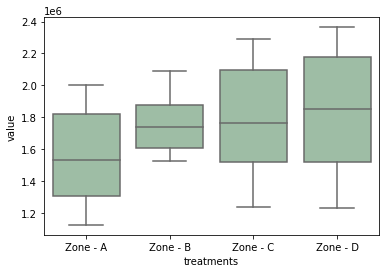

In [11]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences between different treatments
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
plt.show()

In [12]:
data.agg([np.median])

,Zone - A,Zone - B,Zone - C,Zone - D
median,1534390.0,1740365.0,1767047.0,1854412.0


> ***Insights:-***
* Here mean sales generated by each zone is different.

### ● Total sales generated by all the zones for each month.

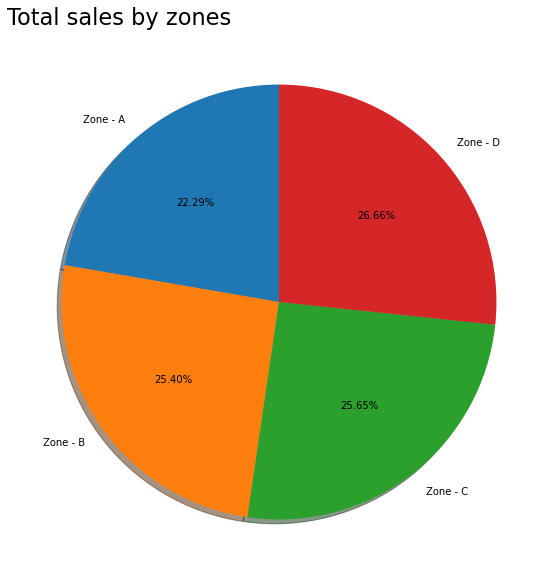

In [24]:
# Variable for plot
explode = (0.1, 0, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(10, 10))
plt.pie(data.loc[:,['Zone - A', 'Zone - B', 'Zone - C','Zone - D']].sum(), shadow=True, startangle=90, 
        labels = ['Zone - A', 'Zone - B', 'Zone - C','Zone - D'], autopct='%1.2f%%')
plt.title(label="Total sales by zones",
          loc="left",
          fontsize=22.5)

plt.show()

> ***Insights:-***
* Total sales of ***Zone-B and Zone-C are allmost same.***

In [14]:
data['Total'] = data['Zone - A'] + data['Zone - B'] + data['Zone - C'] + data['Zone - D']
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [22]:
data1= data[(data['Total'] == data['Total'].max() )] 
data1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
3,Month - 4,1871571,1759617,2290580,2252681,8174449


In [23]:
data2= data[(data['Total'] == data['Total'].min() )] 
data2

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
12,Month - 13,1254939,1588473,1348629,1733383,5925424


> ***Insights:-***
* The maximum sales done in Month- 04 and Minimum sales done in month- 13.

### ● Check whether all the zones generate the same amount of sales.

> *** Define Hypothesis ***

If the same amount was spent for the three advertisements, definitely their mean will be same

*   The Null Hypothesis, ***H(0) - The Means are equal***
*   The Alternative Hypothesis, ***H(a) - At least, one group mean is different from other groups***
*   Significance level = 5%
*   Here, we are doing **One-way ANOVA Test**
Determining F-critical Value

To be able to determine F-critical value, we need:

* Significance level
***df1 = k-1 (dfn — degrees of freedom nominator)***
***df2 = N-k (dfd — degrees of freedom denominator)***

***where k = number of the groups, N = number of total observations.***

In [26]:
from scipy.stats import f 
dfn = 3
dfd = 25
f_crit = f.ppf(1-0.05,dfn,dfd)
print('F-critical=',f_crit)

F-critical= 2.991240909549952


##### Finding F-statistics and P-value

In [29]:
fvalue, pvalue = scipy.stats.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'] , data['Zone - D'])
print('F-Statistic=',fvalue,'\nP-value=',pvalue)
if(pvalue<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

F-Statistic= 5.672056106843581 
P-value= 0.0011827601694503335
We reject null hypothesis


> ***Insights :***
* Since the ***P-Value is smaller than the level of significance*** , we reject our Null Hypothesis.
* Also, ***the F-statistics is greater than the F-ciritical***, leads to the rejection of our Null Hypothesis.
* Thus, we conclude that - ***At least, one group mean is different from other groups OR The sales for the four zones was different.***